In [1]:

from models_otimizador import otimizador
import pandas as pd
import json
import pulp
import numpy as np
import logging
import matplotlib.pyplot as plt

# Configurar o logging para mostrar mensagens INFO
# permitir uso de acentos no formato
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.StreamHandler()  # Para mostrar no output do notebook
    ],
    style='%'
)

# Ou de forma mais simples:
logging.getLogger().setLevel(logging.INFO)


# configurar exibição do dataframe no notebook: sem limite de linhas e colunas e com valor sem estar em notação cientifica, mostrar divisão por milhar
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

%load_ext autoreload
%reload_ext autoreload

%autoreload 2

# Leitura de arquivos de entrada

## Dados da execução

In [2]:
# Taxas de juros
# Taxa selic em 16/12/2025
selic_anual = 0.15

# 40% capital próprio a 13% aa e 60% capital de terceiros a 7% aa
wacc_anual = 0.096

# Conversão da taxa anual para diária considerando juros compostos
def taxa_diaria_juros_compostos(taxa_anual, dias_uteis=252):
    return (1 + taxa_anual) ** (1 / dias_uteis) - 1

selic_diaria = taxa_diaria_juros_compostos(selic_anual)
wacc_diaria = taxa_diaria_juros_compostos(wacc_anual)


Pl = 812
Ph = 1140.00




In [26]:
selic_diaria

0.0005547647074928275

In [27]:
wacc_diaria

0.0003638248528394783

In [3]:
pulp.listSolvers(onlyAvailable=True)

['CPLEX_CMD', 'PULP_CBC_CMD']

In [6]:
# lê dataframe do csv
options_df = pd.read_csv('entradas/options_summary.csv', index_col=0)


# # # adiciona nova linha no dataframe com as opções desejadas baseada em um dicionário
run = 15

option = {
    "NOME": "Cen1",
    "NO_BOG": False,
    "BOG_CTE": False,
    "BOG_VAR": True,
    "LOCK_POLICY": True,
    "CAPCOST": True,
    "CAPCOST_version": "V1",
    "CAPCOST_TAX": wacc_diaria,
    "CAPCOST_PRICE": Pl,
    "SOLVER": "CPLEX_CMD"}

# adiciona nova coluna em options_df 


# options_df["CAPCOST_TAX"] = wacc_diaria
# options_df["CAPCOST_PRICE"] = Pl
# options_df["CAPCOST_version"] = "V1"
# SCIP_CMD

options_df.loc[run] = option

# # # salva dataframe em csv
options_df.to_csv('entradas/options_summary.csv', index=True)

In [7]:
options_df

,NOME,NO_BOG,BOG_CTE,BOG_VAR,LOCK_POLICY,CAPCOST,CAPCOST_VALUE,SOLVER,CAPCOST_TAX,CAPCOST_PRICE,CAPCOST_version
run,,,,,,,,,,,
1,Cen1,True,False,False,False,False,NaN,CPLEX_CMD,0.00,812,V2
2,Cen1,False,True,False,False,False,NaN,CPLEX_CMD,0.00,812,V2
3,Cen1,False,True,False,True,False,NaN,CPLEX_CMD,0.00,812,V2
4,Cen1,False,False,True,False,False,NaN,CPLEX_CMD,0.00,812,V2
5,Cen1,False,False,True,True,False,NaN,CPLEX_CMD,0.00,812,V2
6,Cen1,True,False,False,False,True,NaN,CPLEX_CMD,0.00,812,V1
7,Cen1,True,False,False,True,True,NaN,CPLEX_CMD,0.00,812,V1
8,Cen1,True,False,False,False,True,NaN,CPLEX_CMD,0.00,812,V1
9,Cen1,True,False,False,True,True,NaN,CPLEX_CMD,0.00,812,V1


# Execução do Otimizador

In [17]:
# Recupera as opções do dataframe
run = 15
arquivo_excel = 'entradas/entradas.xlsx'
arquivo_json = 'entradas/entradas.json'

options = options_df.loc[run].to_dict()

# Adiciona custo de capital aos dados de entrada se opção estiver ativada

options['TIMELIMIT'] = 10800
options["RUN"] = run
logging.info(f'Rodando simulação {run} com opções: {options}')


opt = otimizador(options["NOME"], arquivo_json, arquivo_excel, options)

opt.solve_model()

if opt.model.sol_status == 1:
    status = "Solução ótima encontrada"

elif opt.model.sol_status == 2:
    status = "Solução encontrada"

else:
    if opt.model.sol_status == 0:
        status = "ERRO! Nenhuma solução encontrada"

    elif opt.model.sol_status == -1:
        status = "ERRO! Problema sem solução"

    elif opt.model.sol_status == -2:
        status = "ERRO! Infinitas soluções possíveis"
print(status)



2026-01-07 19:03:46,373 - INFO - Rodando simulação 15 com opções: {'NOME': 'Cen1', 'NO_BOG': False, 'BOG_CTE': False, 'BOG_VAR': True, 'LOCK_POLICY': True, 'CAPCOST': True, 'CAPCOST_VALUE': nan, 'SOLVER': 'CPLEX_CMD', 'CAPCOST_TAX': 0.0003638248528394783, 'CAPCOST_PRICE': 812, 'CAPCOST_version': 'V1', 'TIMELIMIT': 10800, 'RUN': 15}
2026-01-07 19:03:46,374 - INFO - Carregando parâmetros para o cenário Cen1.
2026-01-07 19:03:46,430 - INFO - Parâmetros carregados para o cenário Cen1. Iniciando otimização.
2026-01-07 19:03:46,435 - INFO - Iniciando definição do modelo de otimização.
2026-01-07 19:03:46,456 - INFO - Variáveis definidas com sucesso.
2026-01-07 19:03:46,458 - INFO - Solver definido com sucesso.
2026-01-07 19:03:46,459 - INFO - Problema definido com sucesso.
2026-01-07 19:03:47,014 - INFO - Problema resolvido com sucesso.


Solução ótima encontrada


# Extração de resultados

In [18]:
opt.extrair_resultados()
custos = opt.calcula_custos()

In [19]:
# # index
# T = opt.entradas["T"]
# r = opt.entradas["r"]
# P = opt.entradas["P"]
# D = opt.entradas["D"]
# W = opt.entradas["W"]
# TP = opt.entradas["TP"]
# I = opt.entradas["I"]

# # variables
# v = opt.resultado_modelo["v"]
# x = opt.resultado_modelo["x"]
# y = opt.resultado_modelo["y"]
# s = opt.resultado_modelo["s"]

# for t in T:
#     if t == 0:
#         v[t] = s[t]*P + x[t] * P  + sum([
#             W[(j, t)] * y[j][t] * P for j in TP]
#         ) - sum(D[(i, t)] * P for i in I)

#     else:
#         v[t] = v[t-1] + v[t-1]*r + x[t] * P  + sum([
#             W[(j, t)] * y[j][t] * P for j in TP]
#         ) - sum([D[(i, t)] * P for i in I])
        
# # add x and v as columns of dataframe
# df_results = pd.DataFrame({'x': [x[t]*P for t in T], 'D': [sum([D[(i, t)] for i in I])*P for t in T ], 
#                            'Wy': [sum([W[(j, t)]*y[j][t] * P for j in TP]) for t in T ],
#                            }, index=T)
# df_results['v'] = [v[t] for t in T]
# # adicionar D

# (df_results['v'] * r).sum()

## Fixando variáveis para teste de BOG

In [20]:
# arquivo_json = 'entradas/entradas.json'
# nome = options["NOME"]
# with open(arquivo_json, 'r', encoding='utf-8') as f:
#     dados = json.load(f)

# # dados[nome]["variaveis_fixadas"] = {}
# if options["SOLVER"] == "SCIP_CMD":
#     dados[nome]["variaveis_fixadas"]["SCIP_CMD"] = {} 
#     dados[nome]["variaveis_fixadas"]["SCIP_CMD"]["x"] = opt.resultado_modelo["x"]
#     dados[nome]["variaveis_fixadas"]["SCIP_CMD"]["y"] = opt.resultado_modelo["y"]
# elif options["SOLVER"] == "PULP_CBC_CMD":
#     dados[nome]["variaveis_fixadas"]["PULP_CBC_CMD"] = {} 
#     dados[nome]["variaveis_fixadas"]["PULP_CBC_CMD"]["x"] = opt.resultado_modelo["x"]
#     dados[nome]["variaveis_fixadas"]["PULP_CBC_CMD"]["y"] = opt.resultado_modelo["y"]
# elif options["SOLVER"] == "CPLEX_CMD":
#     dados[nome]["variaveis_fixadas"]["CPLEX_CMD"] = {} 
#     dados[nome]["variaveis_fixadas"]["CPLEX_CMD"]["x"] = opt.resultado_modelo["x"]
#     dados[nome]["variaveis_fixadas"]["CPLEX_CMD"]["y"] = opt.resultado_modelo["y"]

# # salvar de volta no arquivo entradas.json
# with open('entradas/entradas.json', 'w') as f:
#     json.dump(dados, f, indent=4)

# Escrita das saídas

In [21]:
# lê json de saídas
saidas_json = json.load(open('saidas/saidas.json', 'r'))

# saidas_json = {}
# adiciona novo resultado
saidas_json[f"{run}"] = {
    'options': options,
    'status': status,
    'solution_time': opt.resultado_modelo["solution_time"],
    'objective_value': opt.resultado_modelo["objective_value"],
    'custos': custos
    }


path = f'saidas/saidas.json'
with open(path, 'w') as f:
    json.dump(saidas_json, f, indent=4)

# Plot de resultados


In [22]:
# demanda = sum([sum([opt.entradas["D"][(i, t)] for i in I]) for t in T])
# preco = demanda*812
# print(demanda)
# print(preco)

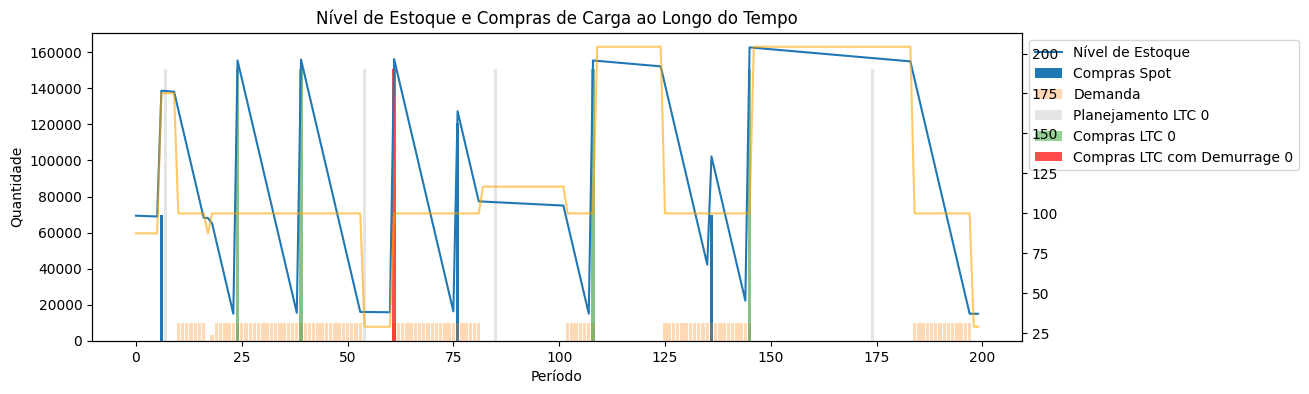

In [23]:
import matplotlib.pyplot as plt

# criar a pasta saidas/graficos se não existir
import os
os.makedirs('saidas/graficos', exist_ok=True)

T=opt.entradas["T"]
J = opt.entradas["J"]
J1 = range(len(opt.entradas["J"]) - 1)
I = opt.entradas["I"]
nome = options["NOME"]
            
fig, ax = plt.subplots(figsize=(12, 4))

# Nível do estoque
ax.plot(T, opt.resultado_modelo["s"], label="Nível de Estoque")

# Compras carga spot
ax.bar(T, opt.resultado_modelo["x"], label="Compras Spot")

# Quantidade de BOG gerada
if opt.options["BOG_CTE"] or opt.options["BOG_VAR"]:
    ax2 = ax.twinx()
    ax2.plot(T, opt.resultado_modelo["b"], label="BOG", color='orange', alpha=0.6)

# Demanda
demanda = [sum([opt.entradas["D"][(i, t)] for i in I]) for t in T]
ax.bar(T, demanda, label=f"Demanda",  alpha=0.3)


# Compras LTC por contrato j
for j in J1:
    # Extraindo planejamento de chegada de carga LTC
    i_0 = 0
    i_1 = 0
    W_date = []
    for t in T:
        i_0 = opt.entradas['W'][(j,t)]
        if i_0 == 0:
            W_date.append(0)
        elif i_0 != 0 and i_1 ==0:
            W_date.append(i_0)
        else: 
            W_date.append(0)
        
        i_1 = i_0
    
    # Extraindo compras com demurrage e sem demurrage
    compras_ltc_regular = []
    compras_ltc_demurrage = []
    for t in T:
        compra = opt.entradas['W'][(j, t)] * opt.resultado_modelo["y"][j][t]
        demurrage = opt.entradas['DEM'][(j, t)] * opt.resultado_modelo["y"][j][t]
        if demurrage > 0:
            compras_ltc_demurrage.append(compra)
            compras_ltc_regular.append(0)
        else:
            compras_ltc_regular.append(compra)
            compras_ltc_demurrage.append(0)
    
    ax.bar(T,W_date,label=f"Planejamento LTC {j}", alpha=0.2, color= 'grey')
    
    ax.bar(
        T,
        compras_ltc_regular,
        label=f"Compras LTC {j}",
        alpha=0.5
    )
    ax.bar(T, compras_ltc_demurrage, label=f"Compras LTC com Demurrage {j}", alpha=0.7, color='red')
    
ax.set_xlabel("Período")
ax.set_ylabel("Quantidade")
ax.set_title("Nível de Estoque e Compras de Carga ao Longo do Tempo")
# posicionar legenda fora do gráfico
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
# salvar figura na pasta saidas com o nome do cenário e run
plt.savefig(f'saidas/graficos/{nome}_run{run}_estoque_compras.png', bbox_inches='tight')
plt.show()

# # Plot de linha com variáveis cc_acc, ca_acc, 
# fig, ax = plt.subplots(figsize=(12, 3))
# for j in J1:
#     ax.plot(T, opt.resultado_modelo["ca_acc"][j], label=f"ca_acc_j{j}")
#     ax.plot(T, opt.resultado_modelo["cc_acc"][j], label=f"cc_acc_j{j}")
    
# ax.set_xlabel("Período")
# ax.set_ylabel("Quantidade")
# ax.set_title("Variáveis Acumuladas e Contratos ao Longo do Tempo")
# ax.legend()
# # plt.savefig(f'saidas/graficos/{nome}_run{run}_variaveis_acumuladas.png', bbox_inches='tight')
# plt.show()

# # Plot de barra com variáveis lgc e topc para cada nível, contrato j e periodo t
# fig, ax = plt.subplots(figsize=(12, 3))
# for j in J1:
#     for c in opt.entradas["C"]:
#         ax.bar(
#             T,
#             opt.resultado_modelo["lgc"][j][c],
#             label=f"lgc_j{j}_c{c}"
#         )  
#     for m in opt.entradas["M"]:
#         ax.bar(
#             T,
#             opt.resultado_modelo["topc"][j][m],
#             label=f"topc_j{j}_m{m}"
#         )
# ax.set_xlabel("Período")
# ax.set_ylabel("Quantidade")
# ax.set_title("Variáveis lgc e topc ao Longo do Tempo")
# ax.legend()
# # plt.savefig(f'saidas/graficos/{nome}_run{run}_variaveis_lgc_topc.png', bbox_inches='tight')
# plt.show()

In [24]:

# resultados_df = pd.DataFrame({"Período": T})
# resultados_df.set_index("Período", inplace=True)
# resultados_df["Compras_Spot"] = opt.resultado_modelo["x"]
# resultados_df["Nível_Estoque"] = opt.resultado_modelo["s"]
# for j in J1:
#     resultados_df[f"Compras_LTC_j{j}"] = [opt.entradas['W'][(j, t)] * opt.resultado_modelo["y"][j][t] for t in T]
#     resultados_df[f"ca_acc_j{j}"] = opt.resultado_modelo["ca_acc"][j]
#     resultados_df[f"cc_acc_j{j}"] = opt.resultado_modelo["cc_acc"][j]
#     for c in C:
#         resultados_df[f"lgc_j{j}_c{c}"] = [
#             opt.resultado_modelo["lgc"][j][c][t] for t in T
#         ]
#     for m in M:
#         resultados_df[f"topc_j{j}_m{m}"] = [
#             opt.resultado_modelo["topc"][j][m][t] for t in T
#         ]

# # fazer com que a saída do dataframe seja exibida com todas as linhas e colunas
# pd.set_option('display.max_rows', None)


In [25]:
# # salvar df em excel na pasta saídas. Criar o arquivo se não existir chamado saidas.xlsx. Atribuir o df a uma aba com o nome do cenário e run. Se a aba já existir, sobrescrever.
# import os


# path = 'saidas/saidas.xlsx'
# with pd.ExcelWriter(path, engine='openpyxl', if_sheet_exists='replace', mode='a' if os.path.exists(path) else 'w') as writer:
#     resultados_df.to_excel(writer, sheet_name=f'{nome}_run{run}')